In [73]:
import os
import numpy as np
import pydicom
from sklearn.cluster import MiniBatchKMeans
from pydicom.pixels import iter_pixels
import matplotlib.pyplot as plt
import cv2


n_clusters = 10
batch_size = 1000


folders = ["Tcga_lgg_olio_filtered", "Tcga_lgg_astro_filtered", "Tcga_gbm_filtered"]


kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size)


for folder in folders:
    print(f"Processing folder: {folder}")
    batch_data = []


    
    for file in os.listdir(folder):
        if file.endswith(".dcm"):
            dcm_path = os.path.join(folder, file)
            
            print(dcm_path)
            
            for arr in iter_pixels(dcm_path):

                arr = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
                
                if(arr[0].size == 256):
                    height, width  = arr.shape
                    start_x = (width - 240) // 2
                    start_y = (height - 240) // 2


                    cropped_arr = arr[start_y:start_y+240, start_x:start_x+240]
                    
                    flatten_arr = cropped_arr.flatten()
                                    
                   
                    batch_data.append(flatten_arr)

                else:      
                   
                    flatten_arr = arr.flatten()
                    batch_data.append(flatten_arr)    
                
                if(len(batch_data) == 1000):
                    print(len(batch_data))
                    nmpy_batch_data = np.array(batch_data)
                    print(nmpy_batch_data.shape)
                    kmeans.partial_fit(batch_data)

                    batch_data.clear()

                   

Processing folder: Tcga_lgg_olio_filtered
Tcga_lgg_olio_filtered/TCGA-E1-5311_eae34e16-ffce-4d23-9847-8f0fa4bfc8c6.dcm
1000
(1000, 57600)
1000
(1000, 57600)
Tcga_lgg_olio_filtered/TCGA-FG-8191_1a027670-7b93-4310-b55e-ddb017f64663.dcm
1000
(1000, 57600)
1000
(1000, 57600)
Processing folder: Tcga_lgg_astro_filtered
Tcga_lgg_astro_filtered/TCGA-TM-A7CF_1fe1a0ed-c832-4096-a7cc-72b61d4fb592.dcm
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
Tcga_lgg_astro_filtered/TCGA-S9-A7IZ_4a8a5420-823b-40c9-8a2f-6c3b25100425.dcm
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
Tcga_lgg_astro_filtered/TCGA-DU-A5TY_9c853bbf-815f-4f98-84fb-cc5d4a829add.dcm
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
1000
(1000, 57600)
Tcga_lgg_astro_filtered/TCGA-VM-A8CF_9e322a6b-4a0c-445a-ad83-dd9915ff1b

Tcga_gbm_filtered/TCGA-06-0133_c25f7f34-1a2f-472c-bdbe-0d33ebd98a3e.dcm
[229.83333333 222.075     ]
(371, 57600)


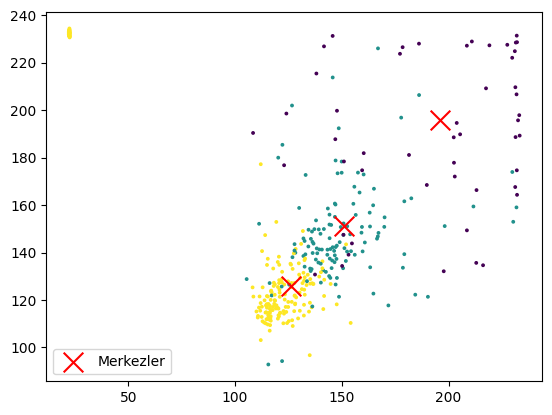

In [75]:




dcm_path = "Tcga_gbm_filtered/TCGA-06-0133_c25f7f34-1a2f-472c-bdbe-0d33ebd98a3e.dcm"

print(dcm_path)

batch_data = []

for arr in iter_pixels(dcm_path):

	arr = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
	
	if(arr[0].size == 256):
		height, width  = arr.shape
		start_x = (width - 240) // 2
		start_y = (height - 240) // 2


		cropped_arr = arr[start_y:start_y+240, start_x:start_x+240]
		
		flatten_arr = cropped_arr.flatten()
			
		
		batch_data.append(flatten_arr)

	else:      
		
		flatten_arr = arr.flatten()
		batch_data.append(flatten_arr)    

result_data = []

for arr in iter_pixels(dcm_path):

	arr = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
	
	if(arr[0].size == 256):
		height, width  = arr.shape
		start_x = (width - 240) // 2
		start_y = (height - 240) // 2


		cropped_arr = arr[start_y:start_y+240, start_x:start_x+240]
		
		
		x_vector = np.mean(cropped_arr, axis=0)  
		y_vector = np.mean(cropped_arr, axis=1)  	
		
		result_data.append((x_vector , y_vector))

	else:      
		
		flatten_arr = arr.flatten()
		x_vector = np.mean(flatten_arr, axis=0)  
		y_vector = np.mean(flatten_arr, axis=1)  	
		
		result_data.append((x_vector , y_vector))
		

nmpy_result_data = np.array(result_data)
print(nmpy_result_data[0,:,0])

nmpy_batch_data = np.array(batch_data)
print(nmpy_batch_data.shape)

labels = kmeans.predict(nmpy_batch_data)
centers = kmeans.cluster_centers_


plt.scatter(nmpy_result_data[:,0,0], nmpy_result_data[:,1,0], c=labels, cmap='viridis', s=3)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label="Merkezler")
plt.legend()
plt.show()

batch_data.clear()
